In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (10,10)

In [2]:
summary = pd.read_csv('./data/summary_listings.csv')

First, take a look at what types of columns we're dealing with (at this point I know essentially nothing about the data).

In [3]:
summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.16,2,365
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,270
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364
4,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.57224,-0.20906,Private room,29,10,129,2020-03-15,0.98,3,43


**minimum_nights** is not a feature I was expecting to see, so I create a histogram.

In [126]:
summary['minimum_nights'].describe()

count    76534.000000
mean         5.308582
std         23.053843
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64

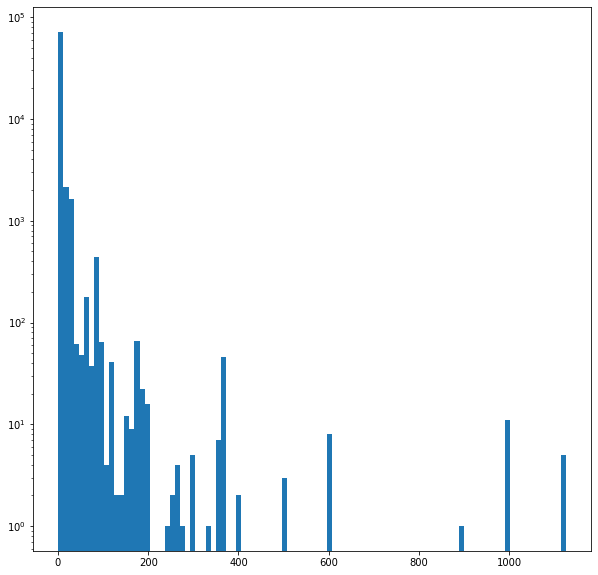

In [125]:
plt.hist(summary['minimum_nights'], bins=100)
plt.yscale('log')

I made the y-axis log-scale because it was meaningless before.  So most units require very few minimum_nights - not a surprise.  I wasn't expecting to see units with minimum_nights on the order of *years*, but okay.

I see the column **room_type** and **price** and suppose that looking at them will be insightful.

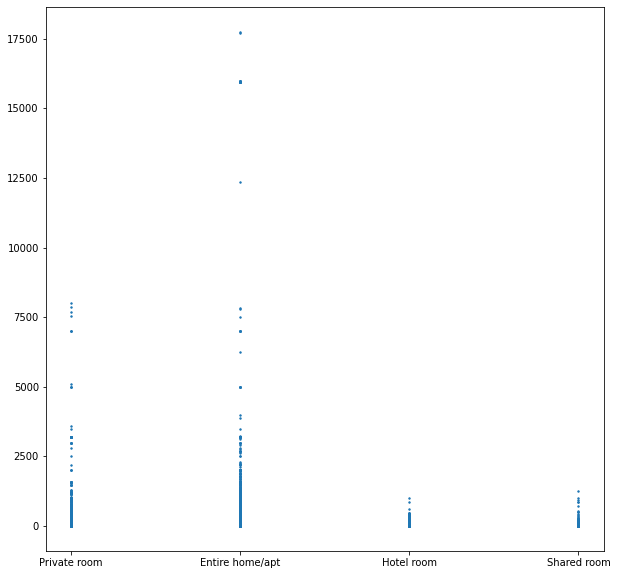

In [108]:
plt.scatter(x=summary['room_type'],y=summary['price'],s=2)

So it seems that *hotel rooms* and *shared rooms* are similar in price distribution, while *private rooms* have a much larger max and vary a bit more, and the same (but more extreme) applies to *Entire home/apt*.

In [17]:
summary.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,41633.0,157.257464,392.384574,8.0,79.0,108.0,163.0,17746.0
Hotel room,559.0,119.881932,103.313475,0.0,68.0,95.0,151.0,999.0
Private room,33734.0,61.213612,167.018618,0.0,30.0,40.0,59.0,8000.0
Shared room,608.0,62.592105,109.984295,7.0,20.0,33.5,57.0,1260.0


I decide to look at the histograms of the data grouped by **room_type**.

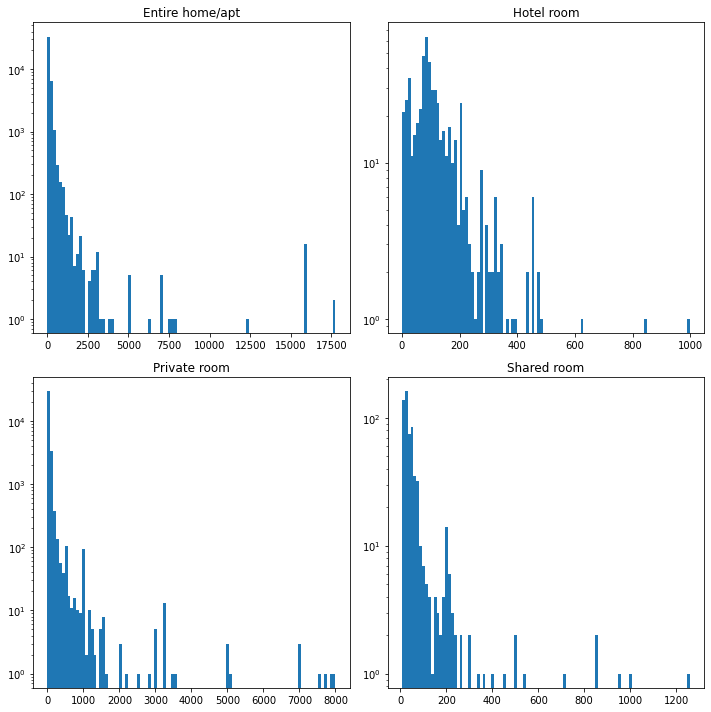

In [107]:
groups = summary.groupby(['room_type'])
for i,g in enumerate(groups):
    ax = plt.subplot(2,2,i+1)
    ax.hist(g[1]['price'], bins=100)
    ax.set_title(g[0])
    ax.set_yscale('log')
plt.tight_layout()

The picture for *Hotel room* has the most interesting shape, it looks a bit more like a binomial (or poisson) distribution, with a spike on the low end of prices, while the rest look like exponential distributions.  I guess it makes sense that the number of more rooms available at a price decreases as the price increases, but for hotel rooms this is a little more subtle.  I would interpret it as there being a significant gap between what people who are traveling as tourists can afford and what businessmen will be willing to pay.

Now I'm curious if there is any relationship between **minimum_nights** and **price**, with respect to each group.

In [35]:
summary.groupby('room_type')[['price','minimum_nights']].describe()

price                                                   \
                   count        mean         std  min   25%    50%    75%   
room_type                                                                   
Entire home/apt  41633.0  157.257464  392.384574  8.0  79.0  108.0  163.0   
Hotel room         559.0  119.881932  103.313475  0.0  68.0   95.0  151.0   
Private room     33734.0   61.213612  167.018618  0.0  30.0   40.0   59.0   
Shared room        608.0   62.592105  109.984295  7.0  20.0   33.5   57.0   

                         minimum_nights                                      \
                     max          count      mean        std  min  25%  50%   
room_type                                                                     
Entire home/apt  17746.0        41633.0  5.681695  20.682956  1.0  2.0  3.0   
Hotel room         999.0          559.0  2.059034   4.078322  1.0  1.0  1.0   
Private room      8000.0        33734.0  4.921741  25.865488  1.0  1.0  2.0   
Shared room       1260.0          608.0  4.210526  21.140117  1.0  1.0  1.0   

                              
                 75%     max  
room_type                     
Entire home/apt  4.0  1124.0  
Hotel room       2.0    90.0  
Private room     3.0  1125.0  
Shared room      2.0   365.0

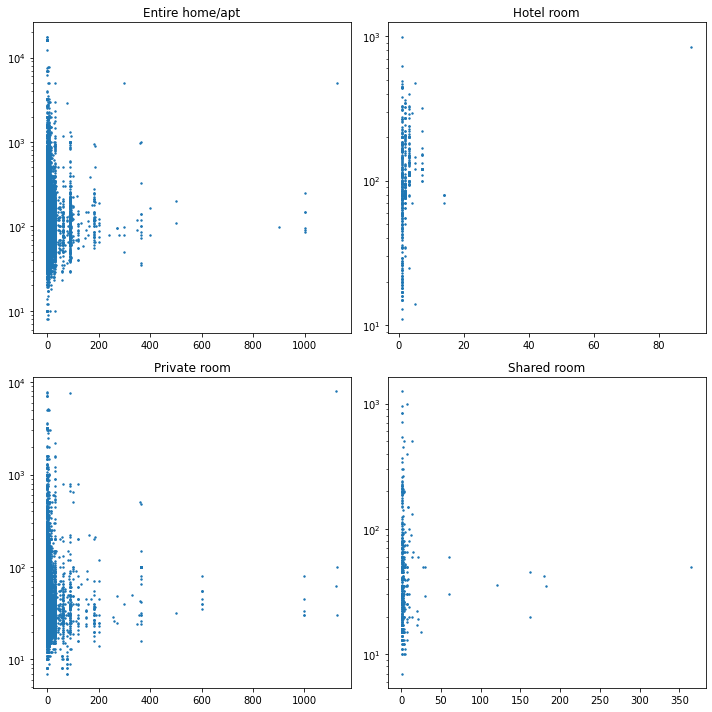

In [106]:
groups = summary.groupby(['room_type'])
for i,g in enumerate(groups):
    ax = plt.subplot(2,2,i+1)
    ax.scatter(x=g[1]['minimum_nights'],y=g[1]['price'],s=2)
    ax.set_title(g[0])
    ax.set_yscale('log')
plt.tight_layout()

These charts don't seem to jump out and tell me anything interesting right off the bat.  I'll look into the **neighbourhoods** now.

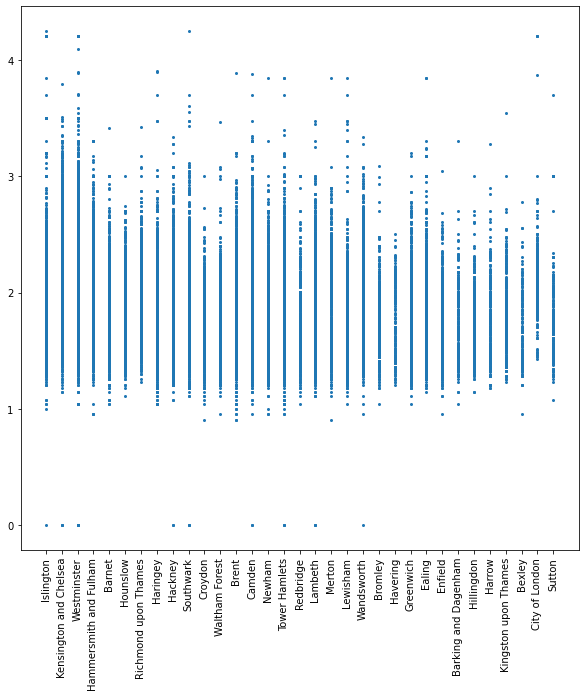

In [128]:
plt.xticks(rotation=90)
plt.scatter(x=summary['neighbourhood'],y=np.log10(summary['price']+1),s=4)

This to me clearly shows that prices are related to neighbourhoods (okay, I probably didn't need sophisticated plotting and statistics software to tell me that).  It does seem, however, that not all neighbourhoods are necessarily distinguishable by price alone.

Now, I create the same chart, but grouped by **room_type**

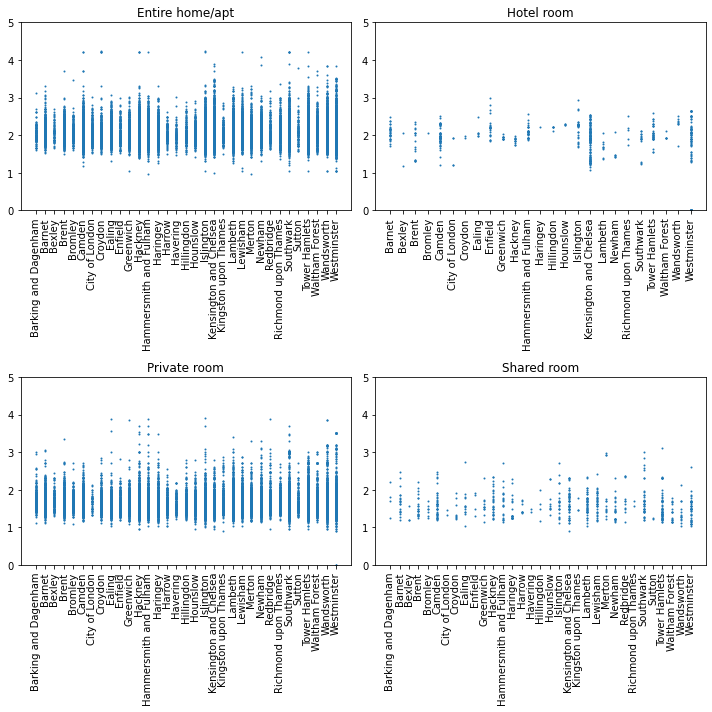

In [129]:
groups = summary.groupby(['room_type'])

for i,g in enumerate(groups):
    ax = plt.subplot(2,2,i+1)
    plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
    ax.scatter(x=g[1]['neighbourhood'].sort_values(),y=np.log10(g[1]['price'] + 1),s=1)
    ax.set_title(g[0])
    ax.set_ylim(0,5)

plt.tight_layout()

Unfortunately, this didn't give me any immediate impressions, however it does give a rough visualization of how the types of rooms are distributed.

Next, I think about using latitude/longitude as the x/y axis, and make a plot with it.  To make it a little more interesting, I color locations by **room_type**, and add a slider whose values determines the minimum price of units shown.

In [134]:
from ipywidgets import interact, IntSlider
def plot_scatter(m_price):
    plt.xlim(51.25, 51.75)
    plt.ylim(-.5, .2)
    s = summary[summary['price'] > m_price]
    alpha = .5
    cm = {
        'Private room': (1,0,0,alpha), # red
        'Entire home/apt': (0,1,0,alpha), # green
        'Hotel room': (0,0,1,alpha), # blue 
        'Shared room': (1,0,1,alpha) # purple
    }
    def apply_cm(v): return cm[v]
    c = s['room_type'].apply(apply_cm)
    scatter = plt.scatter(s['latitude'],s['longitude'],c=c,s=1)
    plt.show()
interact(plot_scatter, m_price=IntSlider(min=0, max=10000, value=0, step=20))

interactive(children=(IntSlider(value=0, description='m_price', max=10000, step=20), Output()), _dom_classes=(…

<function __main__.plot_scatter(m_price)>

This chart speaks for itself, and I think is probably the most useful one I've made.  It pretty much tells the story I've already told, but representing the city in a much more natural way.
(Technical note: this chart should have a legend, but I guess I did it in a silly way and can't add one without doing a little work...)

Now I want to look at price vs location.  The price column in the dataframe is of type `str`, because it is a monetary amount.  This requires a somewhat silly translation into type `float`, but whatever.  I played around with the colormap (`cm`), but none of the charts ended up really speaking to me.

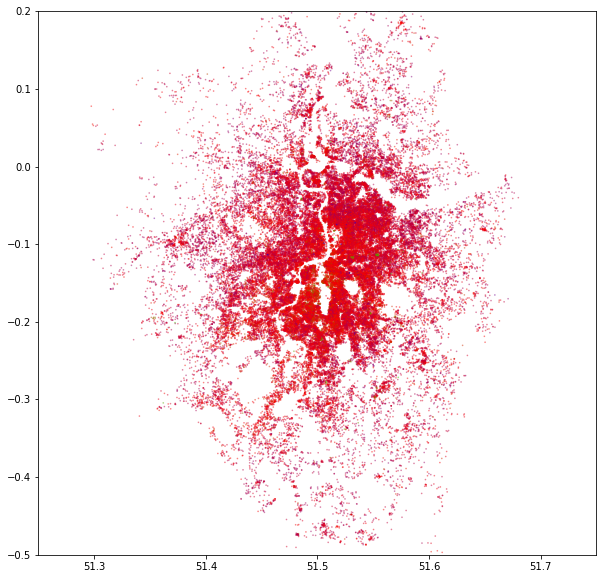

In [93]:
prices = summary['price'].replace(r'\$|\.00|,','',regex=True).astype(float)
_prices = np.log(prices+1)
plt.xlim(51.25, 51.75)
plt.ylim(-.5, .2)
c = cm.brg(_prices / _prices.max(), alpha=.4)
plt.scatter(summary['latitude'],summary['longitude'],c=c,s=.5)

Now I thought I'd look at **reviews_per_month** vs **price**, thinking that **reviews_per_month** could roughly represent how often the unit is rented.

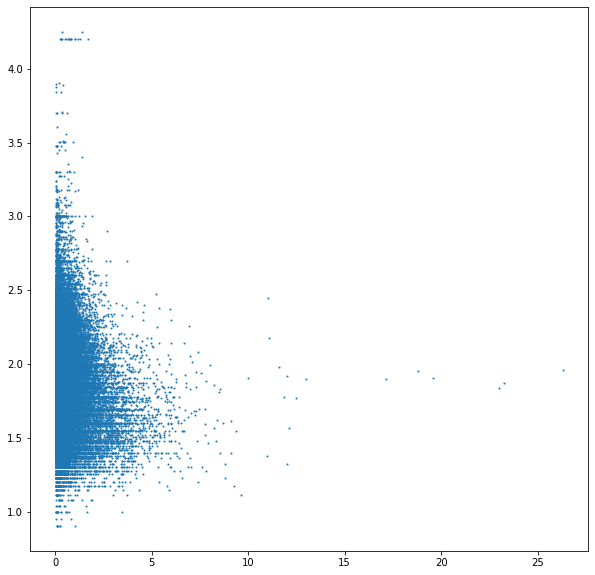

In [113]:
plt.scatter(x=summary['reviews_per_month'],y=np.log10(summary['price']),s=1)
# plt.ylim(0,2500)

Okay, this is mildly interesting, and may be worth looking into more, but not necessarily worth looking into immediately (also, it would be better to see if there is more accurate data on visits if that is what I actually care about).

I want to look at the summary stats for **price** grouped by **room_type**, but only for "reasonably priced" units.  I suppose that the very expensive units are not interesting for most people, and could be considered as outliers for many tasks.

In [140]:
summary.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,41633.0,157.257464,392.384574,8.0,79.0,108.0,163.0,17746.0
Hotel room,559.0,119.881932,103.313475,0.0,68.0,95.0,151.0,999.0
Private room,33734.0,61.213612,167.018618,0.0,30.0,40.0,59.0,8000.0
Shared room,608.0,62.592105,109.984295,7.0,20.0,33.5,57.0,1260.0


In [139]:
s = summary[summary['price'].replace(r'\$|\.00|,','',regex=True).astype(float) < 1000]
s.groupby('room_type')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,41347.0,139.179191,104.893554,8.0,79.0,107.0,160.0,999.0
Hotel room,559.0,119.881932,103.313475,0.0,68.0,95.0,151.0,999.0
Private room,33576.0,53.113265,54.605922,0.0,30.0,40.0,59.0,999.0
Shared room,606.0,59.069307,91.113979,7.0,20.0,33.0,55.0,950.0


In [138]:
s = summary[summary['price'].replace(r'\$|\.00|,','',regex=True).astype(float) < 500]
s.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,40644.0,130.231941,78.292321,8.0,78.00,105.0,157.0,499.0
Hotel room,556.0,116.079137,88.909839,0.0,66.75,95.0,150.0,488.0
Private room,33411.0,50.381042,37.016160,0.0,30.00,40.0,58.0,499.0
Shared room,599.0,51.562604,56.173188,7.0,20.00,33.0,55.0,450.0


Okay, so we can see tha the quantiles don't change much from the different summaries, but that the standard-deviation decreases significantly for *Entire home/apt*, while the counts change very little.  This suggests that limiting the max price may be a useful (i.e. easy, efficient, simple) way of restricting the dataset in a meaningful way.

At this point, I'm done playing around and am ready to start considering a more interesting task.
While not mentioned in the other notebook, I downloaded and looked at the `.head()`s of the other datasets, and then came up with the scenario described there.